In [93]:
#Checking working directory
import os
os.getcwd()

'/Users/LVaradharajen/Desktop/Python_DS'

In [94]:
import pandas as pd #For Data Crunching
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns #For Visualiztion
import matplotlib.pyplot as plt #For tight layout

In [95]:
#Import the data
Risk_Train_Data = pd.read_csv("/Users/LVaradharajen/Desktop/Python_DS/Credit_Risk_Train_data.csv")
Risk_Test_Data = pd.read_csv("/Users/LVaradharajen/Desktop/Python_DS/Credit_Risk_Test_data.csv")

In [96]:
Risk_Train_Data.shape

(614, 13)

In [97]:
Risk_Test_Data.shape

(367, 13)

In [98]:
Risk_Train_Data.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002841,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [99]:
Risk_Test_Data.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002400,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban,Y
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140,290
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN,NaN


In [100]:
train_cat_na = ["Gender","Married","Dependents","Self_Employed"]
test_cat_na = ["Gender","Dependents","Self_Employed"]

In [101]:
#missing value treatment for categorical independent variables
import statistics

for item in train_cat_na:
    Risk_Train_Data[item].fillna((statistics.mode(Risk_Train_Data[item])), inplace = True)
    
for item in test_cat_na:
    Risk_Test_Data[item].fillna((statistics.mode(Risk_Test_Data[item])), inplace = True)

In [102]:
Risk_Train_Data.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002841,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [103]:
Risk_Test_Data.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,367,367,367,367,367,367,367.000000,367.000000,362.000000,361.000000,338.000000,367,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002400,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban,Y
freq,1,297,233,210,283,330,NaN,NaN,NaN,NaN,NaN,140,290
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN,NaN


In [104]:
train_num_na = ["LoanAmount","Loan_Amount_Term","Credit_History"]
test_num_na = ["LoanAmount","Loan_Amount_Term","Credit_History"]

In [105]:
#missing value treatment for categorical independent variables

for item in train_num_na:
    Risk_Train_Data[item].fillna((Risk_Train_Data[item].median()), inplace = True)
    
for item in test_num_na:
    Risk_Test_Data[item].fillna((Risk_Test_Data[item].median()), inplace = True)

In [106]:
Risk_Train_Data.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002841,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [107]:
Risk_Test_Data.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,367,367,367,367,367,367,367.000000,367.000000,367.000000,367.000000,367.000000,367,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002400,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban,Y
freq,1,297,233,210,283,330,NaN,NaN,NaN,NaN,NaN,140,290
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,135.980926,342.822888,0.839237,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,60.959739,64.658402,0.367814,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,101.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,157.500000,360.000000,1.000000,NaN,NaN


In [108]:
Risk_Train_Data["CoapplicantIncome"].quantile(q=0.99)

8895.890000000003

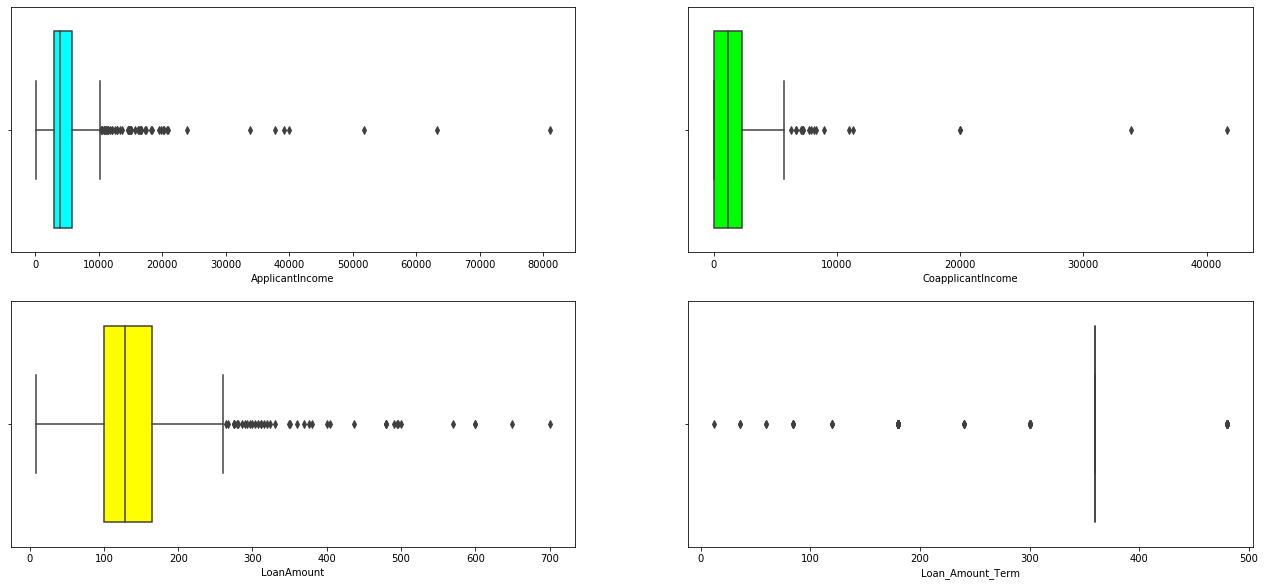

In [109]:
#Train boxplot
import seaborn as sns
tr_num = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
c = 1
col = ["aqua","lime","yellow","white"]
plt.figure()
for i in tr_num:
    plt.subplot(2,2,c)
    sns.boxplot(Risk_Train_Data[i],boxprops = dict(facecolor = col[c-1]))
    c += 1
plt.subplots_adjust(right = 3,top = 2)
plt.show()

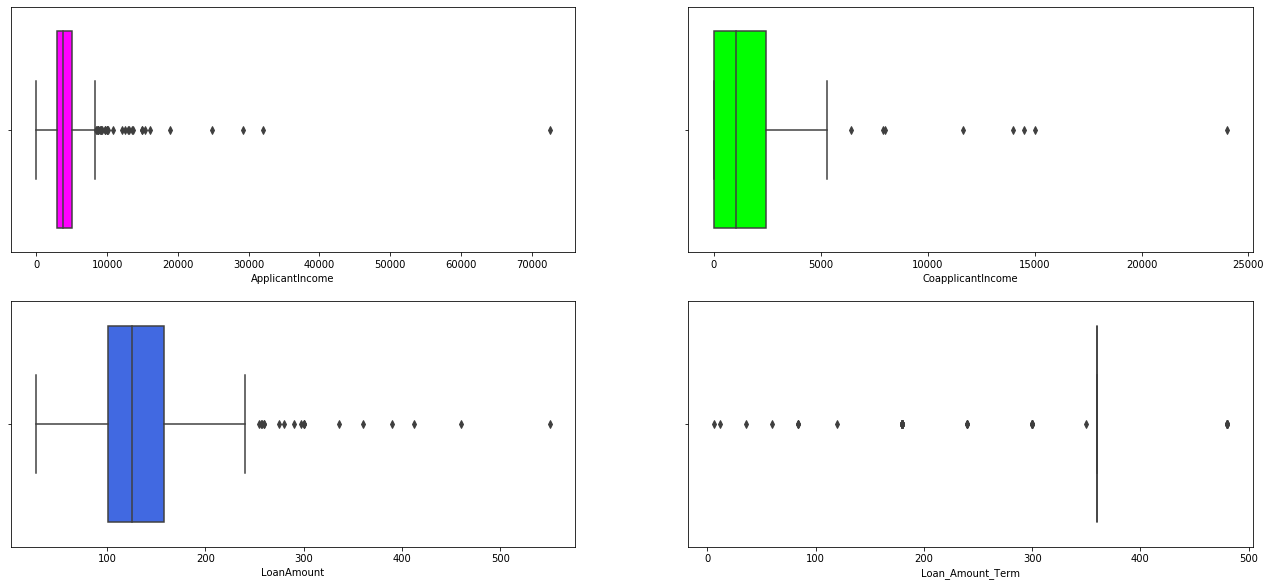

In [110]:
#Test boxplot
te_num = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
ct = 1
colt = ["magenta","lime","royalblue","white"]
plt.figure()
for i in tr_num:
    plt.subplot(2,2,ct)
    sns.boxplot(Risk_Test_Data[i],boxprops = dict(facecolor = colt[ct-1]))
    ct += 1
plt.subplots_adjust(right = 3,top = 2)
plt.show()

In [111]:
#outlier treatment for numeric columns

#Train Data
p25 = []
p75 = []
iqr = []
iqrll = []
iqrul = []
for i in tr_num:
    p25.append(Risk_Train_Data[i].quantile(q=0.25))
    p75.append(Risk_Train_Data[i].quantile(q=0.75))

for i in range(4):
    iqr.append(p75[i]-p25[i])
    
for i in range(4):
    iqrll.append(p25[i]-1.5*iqr[i])
    iqrul.append(p75[i]+1.5*iqr[i])

j = 0
for i in tr_num:
    Risk_Train_Data.loc[Risk_Train_Data[i]>iqrul[j],i] = Risk_Train_Data[i].quantile(q=0.985)
    Risk_Train_Data.loc[Risk_Train_Data[i]<iqrll[j],i] = Risk_Train_Data[i].quantile(q=0.015)
    j += 1


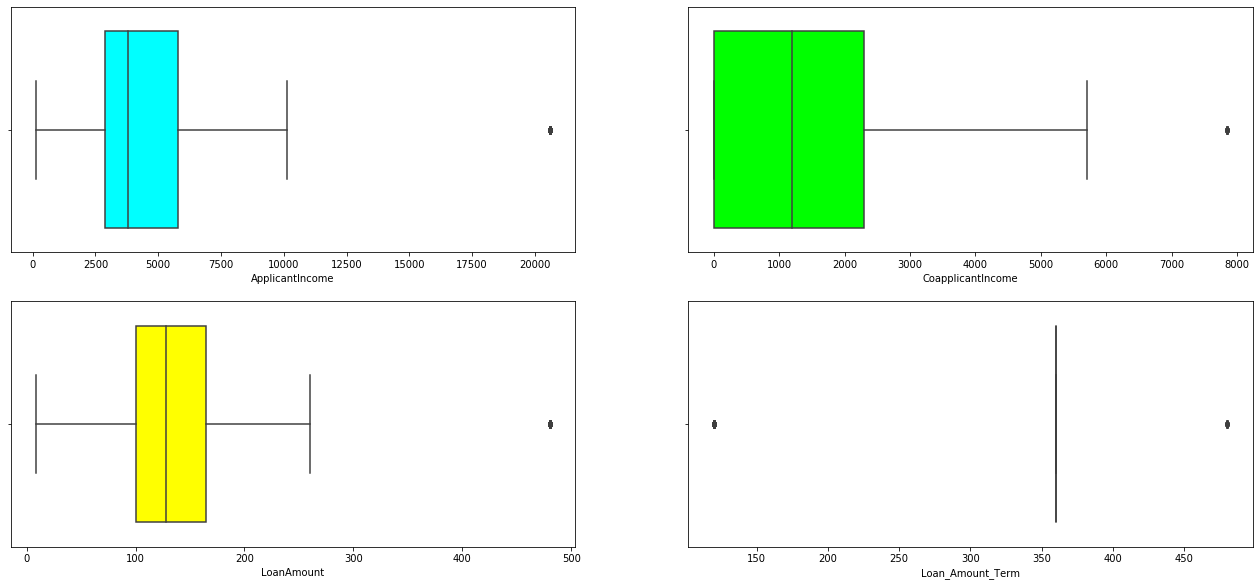

In [112]:
#Train data Box Plot after outlier treatment
tr_num = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
c = 1
col = ["aqua","lime","yellow","white"]
plt.figure()
for i in tr_num:
    plt.subplot(2,2,c)
    sns.boxplot(Risk_Train_Data[i],boxprops = dict(facecolor = col[c-1]))
    c += 1
plt.subplots_adjust(right = 3,top = 2)
plt.show()

In [113]:
#outlier treatment for numeric columns

#Test Data
p25 = []
p75 = []
iqr = []
iqrll = []
iqrul = []
for i in tr_num:
    p25.append(Risk_Test_Data[i].quantile(q=0.25))
    p75.append(Risk_Test_Data[i].quantile(q=0.75))

for i in range(4):
    iqr.append(p75[i]-p25[i])
    
for i in range(4):
    iqrll.append(p25[i]-1.5*iqr[i])
    iqrul.append(p75[i]+1.5*iqr[i])

j = 0
for i in tr_num:
    Risk_Test_Data.loc[Risk_Test_Data[i]>iqrul[j],i] = Risk_Test_Data[i].quantile(q=0.985)
    Risk_Test_Data.loc[Risk_Test_Data[i]<iqrll[j],i] = Risk_Test_Data[i].quantile(q=0.015)
    j += 1



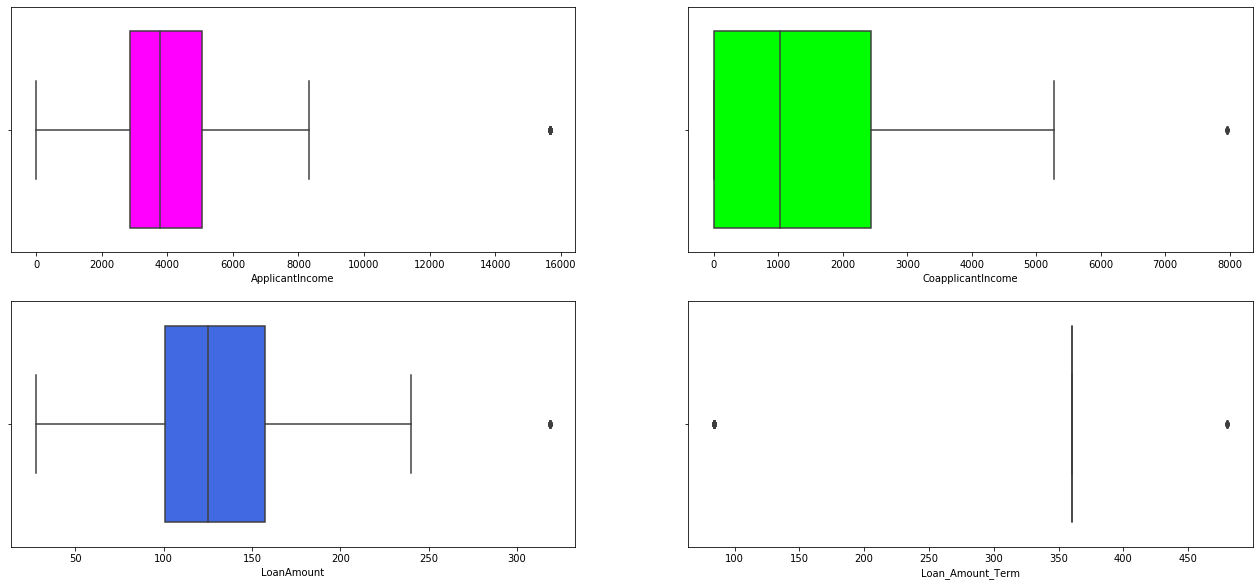

In [114]:
#Test boxplot after outlier treatment
te_num = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
ct = 1
colt = ["magenta","lime","royalblue","white"]
plt.figure()
for i in tr_num:
    plt.subplot(2,2,ct)
    sns.boxplot(Risk_Test_Data[i],boxprops = dict(facecolor = colt[ct-1]))
    ct += 1
plt.subplots_adjust(right = 3,top = 2)
plt.show()

In [115]:
train_corr = Risk_Train_Data.corr(method = "pearson")
train_corr.to_csv("RiskTrainCorr.csv")

In [116]:
#train
cat_var = ["Gender","Married","Education","Self_Employed","Property_Area"]
drop_var = ["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area"]
dummies = []
for i in cat_var:
    dummies.append(pd.get_dummies(Risk_Train_Data[i], prefix = i).iloc[:, 1:])
j=0
for i in cat_var:
    Risk_Train_Data = pd.concat([Risk_Train_Data, dummies[j]], axis = 1)
    j += 1
Risk_Train_Data.drop(drop_var, axis = 1, inplace = True)
Risk_Train_Data.describe(include = "all")

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
unique,4,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,0,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
freq,360,NaN,NaN,NaN,NaN,NaN,422,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5464.922638,1481.438420,151.956026,334.397394,0.855049,NaN,0.817590,0.653094,0.218241,0.133550,0.379479,0.328990
std,NaN,4868.660376,1816.712021,98.588040,80.964083,0.352339,NaN,0.386497,0.476373,0.413389,0.340446,0.485653,0.470229
min,NaN,150.000000,0.000000,9.000000,120.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000


In [117]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Risk_Train_Data["Dependents"] = labelencoder.fit_transform(Risk_Train_Data["Dependents"])

In [118]:
Risk_Train_Data["Loan_Status"].loc[Risk_Train_Data["Loan_Status"] == 'Y'] = 1
Risk_Train_Data["Loan_Status"].loc[Risk_Train_Data["Loan_Status"] == 'N'] = 0
Risk_Train_Data.describe(include = "all")

/Users/LVaradharajen/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5464.922638,1481.438420,151.956026,334.397394,0.855049,0.687296,0.817590,0.653094,0.218241,0.133550,0.379479,0.328990
std,1.009623,4868.660376,1816.712021,98.588040,80.964083,0.352339,0.463973,0.386497,0.476373,0.413389,0.340446,0.485653,0.470229
min,0.000000,150.000000,0.000000,9.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,20582.370000,7849.015000,480.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
#test
cat_var = ["Gender","Married","Education","Self_Employed","Property_Area"]
drop_var = ["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area"]
dummiest = []
for i in cat_var:
    dummiest.append(pd.get_dummies(Risk_Test_Data[i], prefix = i).iloc[:, 1:])
j=0
for i in cat_var:
    Risk_Test_Data = pd.concat([Risk_Test_Data, dummiest[j]], axis = 1)
    j += 1
Risk_Test_Data.drop(drop_var, axis = 1, inplace = True)
Risk_Test_Data.describe(include = "all")

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,367,367.000000,367.000000,367.000000,367.000000,367.000000,367,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
unique,4,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,0,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
freq,210,NaN,NaN,NaN,NaN,NaN,290,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4876.251117,1466.538747,135.690681,331.029973,0.839237,NaN,0.809264,0.634877,0.228883,0.100817,0.316076,0.381471
std,NaN,3650.874676,1737.471447,57.433924,90.635019,0.367814,NaN,0.393417,0.482122,0.420687,0.301498,0.465578,0.486411
min,NaN,0.000000,0.000000,28.000000,84.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2864.000000,0.000000,101.000000,360.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,5060.000000,2430.500000,157.500000,360.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000


In [120]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Risk_Test_Data["Dependents"] = labelencoder.fit_transform(Risk_Test_Data["Dependents"])

In [121]:
Risk_Test_Data["Loan_Status"].loc[Risk_Test_Data["Loan_Status"] == 'Y'] = 1
Risk_Test_Data["Loan_Status"].loc[Risk_Test_Data["Loan_Status"] == 'N'] = 0
Risk_Test_Data.describe(include = "all")

/Users/LVaradharajen/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.806540,4876.251117,1466.538747,135.690681,331.029973,0.839237,0.790191,0.809264,0.634877,0.228883,0.100817,0.316076,0.381471
std,1.065177,3650.874676,1737.471447,57.433924,90.635019,0.367814,0.407728,0.393417,0.482122,0.420687,0.301498,0.465578,0.486411
min,0.000000,0.000000,0.000000,28.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,15662.880000,7958.840000,318.360000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


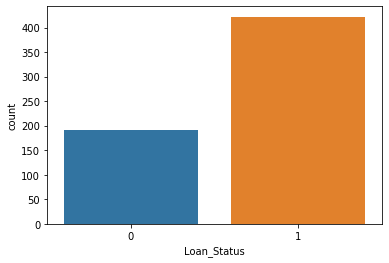

In [122]:
sns.countplot(x = "Loan_Status", data = Risk_Train_Data)

In [123]:
ind_var = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Gender_Male","Married_Yes","Dependents","Education_Not Graduate","Self_Employed_Yes","Property_Area_Semiurban","Property_Area_Urban"]
x = Risk_Train_Data[ind_var]
y = Risk_Train_Data["Loan_Status"]

In [124]:
#Model Iteration 1
CreditModel1 = LogisticRegression()
CreditModel1.fit(x,y)

/Users/LVaradharajen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
y_pred = CreditModel1.predict(x)
print(y_pred)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 

In [126]:
print("Accuracy of Model Iteration 1 for train data: {:.2f}".format(metrics.accuracy_score(y,y_pred)))

Accuracy of Model Iteration 1 for train data: 0.81


In [133]:
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y,y_pred)
print(conmat)

[[ 84 108]
 [  8 414]]


In [134]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.44      0.59       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.73       614
weighted avg       0.83      0.81      0.79       614



In [127]:
x_test = Risk_Test_Data[ind_var]
y_test = Risk_Test_Data["Loan_Status"]

In [128]:
y_pred1 = CreditModel1.predict(x_test)
print(y_pred1)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [129]:
print("Accuracy of Model Iteration 1 for test data: {:.2f}".format(metrics.accuracy_score(y_test,y_pred1)))

Accuracy of Model Iteration 1 for test data: 0.95


In [130]:
#Getting confusion matrix

from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test,y_pred1)
print(conmat)

[[ 58  19]
 [  1 289]]


In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        77
           1       0.94      1.00      0.97       290

    accuracy                           0.95       367
   macro avg       0.96      0.87      0.91       367
weighted avg       0.95      0.95      0.94       367



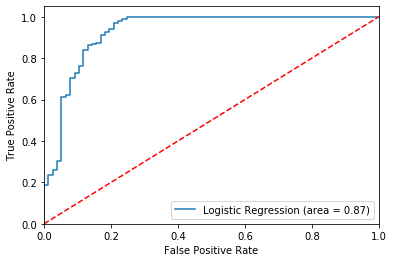

array([1.92647496, 0.92647496, 0.84756419, 0.84691638, 0.83494356,
       0.8342016 , 0.82420996, 0.82407818, 0.81639788, 0.81527583,
       0.77921653, 0.77917157, 0.77763268, 0.77684223, 0.74716772,
       0.74577609, 0.73894155, 0.73877991, 0.73408271, 0.73407066,
       0.73008192, 0.72852883, 0.71279906, 0.71256923, 0.70587652,
       0.70502372, 0.70441011, 0.70335423, 0.70259818, 0.70235095,
       0.69452653, 0.69420071, 0.69022511, 0.68825994, 0.68475647,
       0.68444064, 0.67867324, 0.67348849, 0.63039494, 0.6264987 ,
       0.62064745, 0.61988471, 0.61655225, 0.61462461, 0.59660095,
       0.26322686, 0.25502528, 0.0591469 ])

In [136]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
credit_roc_auc = roc_auc_score(y_test,y_pred1)
fpr,tpr,thresholds = roc_curve(y_test,CreditModel1.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = "Logistic Regression (area = %0.2f)" % credit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
thresholds

In [34]:
a = '12345'
for i in range(len(a)-1,-1,-1):
    print(a[i::-1])

54321
4321
321
21
1
